In [1]:
import time
import itertools
import time, os, fnmatch, shutil
import pickle
import re
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
import matplotlib

#matplotlib.rcParams.update({'font.size': 22})

%matplotlib inline

from __future__ import print_function, division
import requests

In [3]:
folder = '/Users/torrie/Documents/Metis_Project_3_(McNulty)/'
pkl_filename_master = folder + 'All_data_final_with_ins.pkl'
with open(pkl_filename_master, 'rb') as picklefile: 
    df_model_data = pickle.load(picklefile)

In [4]:
df_model_data.columns

Index([u'Average_Covered_Charges', u'Average_Medicare_Payments',
       u'Average_Total_Payments', u'DRG_Definition',
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',
       u'Provider_ID', u'Provider_Name', u'Provider_State',
       u'Provider_Street_Address',
       ...
       u'Uninsured: MOE', u'Uninsured: %', u'Uninsured: %MOE',
       u'Insured: Number', u'Insured: MOE', u'Insured: %', u'Insured: %MOE',
       u'county_only', u'State_abbrev', u'State_full'],
      dtype='object', length=145)

In [91]:
df_Model_1 = df_model_data.copy()

In [92]:
Column_list = [u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
              u'log_Average_Covered_Charges_median_3_bins',\
              u'Average_Covered_Charges_median_3_bins']


for column in Column_list:
    df_Model_1[column] = pd.to_numeric(df_Model_1[column])
    df_Model_1[column] = df_Model_1[column].astype(float)
    

In [93]:
#df_Model_1 = df_Model_1.drop(['Patient_payment','Patient_Payments_Stdev','Patient_Payments_Avg','Medicare_Payments_Std','Medicare_Payments_Avg','Total_Payments_Stdev','Total_Payments_Avg','Covered_Charges_Stdev','Covered_Charges_Avg','Provider_Name','Average_Covered_Charges','Provider_Street_Address','Provider_City','Hospital_Referral_Region_Description','Total_Discharges','Average_Total_Payments','Meets_criteria_for_meaningful_use_of_EHRs','Readmission_national_comparison','Patient_experience_national_comparison','Average_Medicare_Payments','Hospital_Name', 'County_Name'],1)

df_Model_1 = df_Model_1.drop([u'Average_Covered_Charges', u'Average_Medicare_Payments',\
       u'Average_Total_Payments', \
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean', u'Average_Covered_Charges_median',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Provider_State', u'Provider_Zip_Code',\
        u'State_spelled', u'County_State',\
        u'County', u'State',u'Percent_female',\
        u'Percent_some_other_race',u'Mean_income_zip',\
                             u'County_Name'],1)
 


In [94]:
df_Model_1.columns

Index([u'DRG_Definition', u'Service_type', u'Hospital_Type',
       u'Hospital_Ownership', u'Emergency_Services',
       u'Average_Covered_Charges_median_3_bins',
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',
       u'Median_Age', u'Percent_over_65', u'Percent_Native_American',
       u'Percent_asian', u'Percent Black or African American',
       u'Percent_hispanic_or_latino', u'Percent_Male',
       u'Percent_Occupied_Housing_Units', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population',
       u'Age Category', u'Income Category', u'Race Category', u'Sex Category',
       u'Year', u'ID', u'Name', u'Demographic Group: Number',
       u'Demographic Group: MOE', u'Uninsured: Number', u'Uninsured: MOE',
       u'Uninsured: %', u'Uninsured: %MOE', u'Insured: Number',
       u'Insured: MOE', u'Insured: %', u'Insured: %MOE', u'county_only',
       u'State_abbrev', u'St

First model will be without ratings d/t data loss of specific hospital types if we leave them in 

In [95]:
df_Model_1a = df_Model_1[df_Model_1.Service_type == '0']

In [96]:
df_Model_1a[[u'Service_type', u'Hospital_Type',\
       u'Hospital_Ownership', u'Emergency_Services',\
       u'Average_Covered_Charges_median_3_bins']].apply(pd.Series.value_counts)
 

,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,Average_Covered_Charges_median_3_bins
False,NaN,NaN,NaN,2782.0,53373.0
True,NaN,NaN,NaN,198548.0,82321.0
0,202656.0,NaN,NaN,NaN,NaN
Acute Care Hospitals,NaN,201330.0,NaN,NaN,NaN
Government - Federal,NaN,NaN,444.0,NaN,NaN
Government - Hospital District or Authority,NaN,NaN,13844.0,NaN,NaN
Government - Local,NaN,NaN,6730.0,NaN,NaN
Government - State,NaN,NaN,4430.0,NaN,NaN
Physician,NaN,NaN,578.0,NaN,NaN
Proprietary,NaN,NaN,31296.0,NaN,NaN


In [97]:
df_Model_1a['Hospital_Ownership'] = df_Model_1a['Hospital_Ownership'].replace('Tribal','zTribal')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [98]:
df_Model_1a.dtypes

DRG_Definition                                object
Service_type                                  object
Hospital_Type                                 object
Hospital_Ownership                            object
Emergency_Services                            object
Average_Covered_Charges_median_3_bins        float64
log_Average_Covered_Charges_median_3_bins    float64
DRG_Definition_count                           int64
Median_Age                                   float64
Percent_over_65                              float64
Percent_Native_American                      float64
Percent_asian                                float64
Percent Black or African American            float64
Percent_hispanic_or_latino                   float64
Percent_Male                                 float64
Percent_Occupied_Housing_Units               float64
Percent_white                                float64
Rental_vacancy_rate                          float64
Homeowner_vacancy_rate                       f

In [99]:
df_Model_1a['Average_Covered_Charges_median_3_bins'].groupby(df_Model_1a['Hospital_Ownership']).mean()

Hospital_Ownership
Government - Federal                           0.885135
Government - Hospital District or Authority    0.938024
Government - Local                             0.703418
Government - State                             1.151693
Physician                                      1.005190
Proprietary                                    1.512046
Voluntary non-profit - Church                  1.091837
Voluntary non-profit - Other                   0.984080
Voluntary non-profit - Private                 0.982432
zTribal                                        0.000000
Name: Average_Covered_Charges_median_3_bins, dtype: float64

In [100]:
df_Model_1a = df_Model_1a.drop(['Service_type',u'Hospital_Type',\
       u'Age Category', u'Income Category', u'Race Category', u'Sex Category',\
       u'Year', u'ID', u'Name', u'Demographic Group: Number',\
       u'Demographic Group: MOE',u'county_only', u'State_abbrev', u'Emergency_Services',\
        u'Percent_over_65',u'Rental_vacancy_rate', u'Uninsured: Number', \
        u'Uninsured: MOE',u'Uninsured: %MOE', u'Insured: Number', \
        u'Insured: MOE', u'Insured: %', u'Insured: %MOE',u'Homeowner_vacancy_rate'],1)


In [103]:
pd.isnull(df_Model_1a).sum()

DRG_Definition                                   0
Hospital_Ownership                            1326
Average_Covered_Charges_median_3_bins            0
log_Average_Covered_Charges_median_3_bins        0
DRG_Definition_count                             0
Median_Age                                   14163
Percent_Native_American                      14163
Percent_asian                                14163
Percent Black or African American            14163
Percent_hispanic_or_latino                   14163
Percent_Male                                 14163
Percent_Occupied_Housing_Units               14163
Percent_white                                14163
Average_family_size                          14163
Median_income_zip                            17807
Zip_population                               17807
Uninsured: %                                 14848
State_full                                   14848
dtype: int64

In [89]:
df_Model_1a.shape

(202656, 18)

In [104]:
df_Model_1a = df_Model_1a.dropna()

In [105]:
df_Model_1a.shape

(170538, 18)

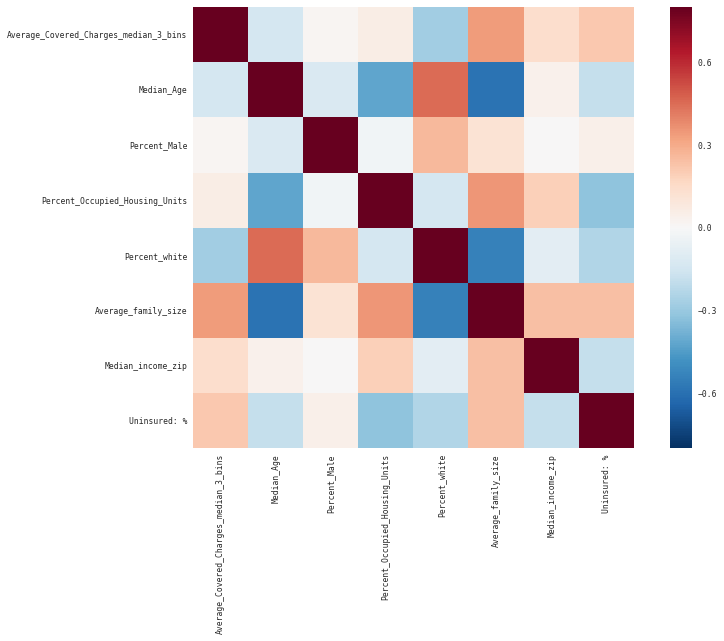

In [106]:
df_Model_1a_check = df_Model_1a.drop([u'log_Average_Covered_Charges_median_3_bins',\
       u'DRG_Definition_count', u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Percent_hispanic_or_latino',u'Zip_population', u'State_full'],1)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = df_Model_1a_check
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

In [111]:
df_Model_1a_plot = df_Model_1a.sample(frac=0.25)


In [112]:
df_Model_1a_plot = df_Model_1a_plot.drop([
       u'DRG_Definition_count', u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Zip_population', u'State_full', u'Hospital_Ownership',\
       u'Average_Covered_Charges_median_3_bins'],1)


In [113]:
df_Model_1a_plot.columns

Index([u'DRG_Definition', u'log_Average_Covered_Charges_median_3_bins',
       u'Median_Age', u'Percent_Male', u'Percent_Occupied_Housing_Units',
       u'Percent_white', u'Average_family_size', u'Median_income_zip',
       u'Uninsured: %'],
      dtype='object')

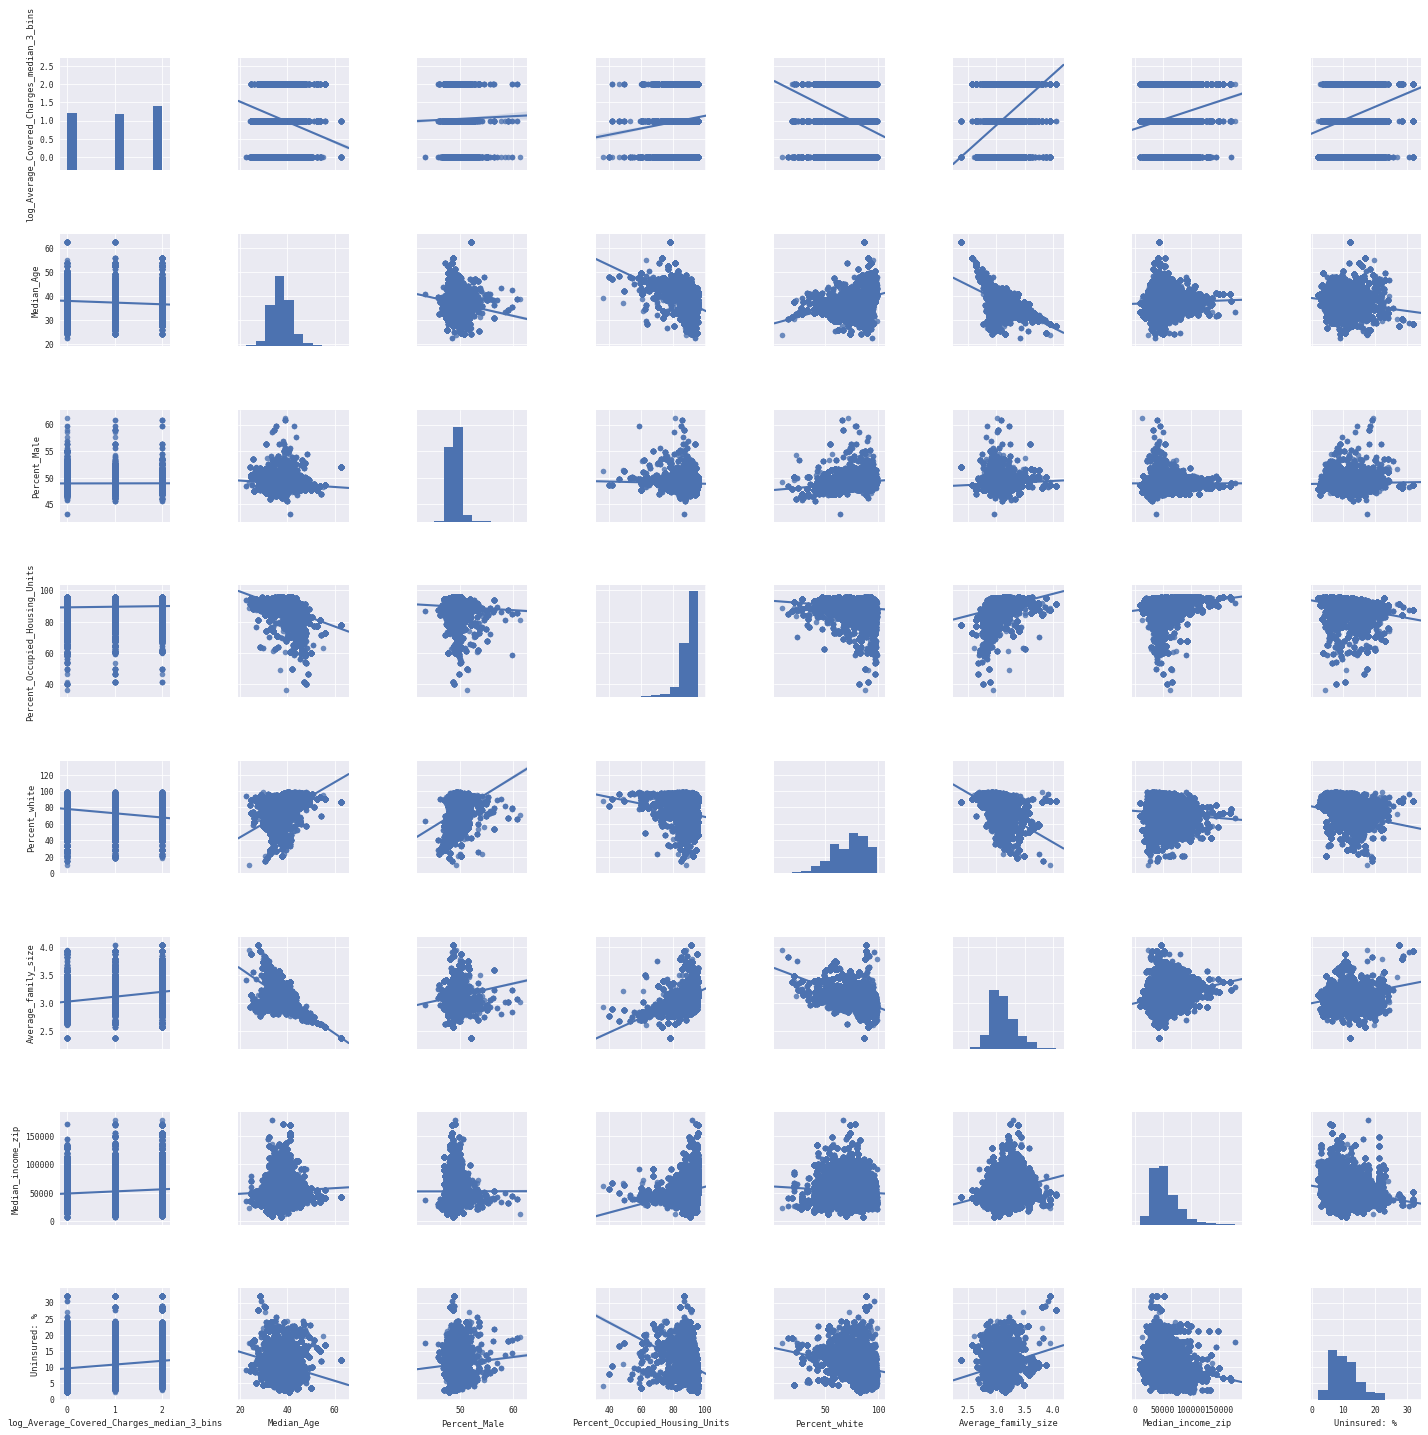

In [115]:
sns.pairplot(df_Model_1a_plot, kind="reg");

Prepare train/test set for checking classification algorithms with cross validation:

In [116]:
df_Model_1a = df_Model_1a[df_Model_1a.DRG_Definition_count >= 1500]

In [173]:
X = df_Model_1a.drop([u'Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins', u'DRG_Definition_count',u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Percent_hispanic_or_latino',u'Zip_population',u'Average_family_size',u'Percent_white'],1)

In [175]:
#y = df_Model_1a[u'Average_Covered_Charges_median_3_bins']

y = df_Model_1a[u'log_Average_Covered_Charges_median_3_bins']

In [176]:
X_fewer_var = X     #.drop([u'Percent_Occupied_Housing_Units_y',u'Average_family_size',u'Percent_over_65'],1)

In [177]:
X_fewer_var.shape

(78979, 8)

In [178]:
X_fewer_var.columns

Index([u'DRG_Definition', u'Hospital_Ownership', u'Median_Age',
       u'Percent_Male', u'Percent_Occupied_Housing_Units',
       u'Median_income_zip', u'Uninsured: %', u'State_full'],
      dtype='object')

In [442]:
X_fewer_var_names = X_fewer_var.rename(columns={'DRG_Definition': 'Diagnosis', 'Hospital_Ownership': 'Hospital Ownership',\
                                                'Median_Age':'Median Age','Percent_Male':'Percent Male',\
                                               'Percent_Occupied_Housing_Units':'Percent Occupied \n Housing Units','Median_income_zip':'Median Income',\
                                               'Zip_population':'Population', 'State_full': 'State Name'})




In [443]:
y.value_counts()

2.0    28477
0.0    26023
1.0    24479
Name: log_Average_Covered_Charges_median_3_bins, dtype: int64

In [444]:
X_coded = X_fewer_var_names.apply(preprocessing.LabelEncoder().fit_transform)

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.3)

Import the necessary tools:

In [268]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV


## KNN:

In [411]:
param_grid = {'n_neighbors': range(1, 100),
              'weights': ['uniform', 'distance']}

rand = RandomizedSearchCV(KNeighborsClassifier(), 
                          param_grid, 
                          cv=4, 
                          scoring='accuracy',
                          n_iter=50)

rand = rand.fit(X_train, y_train)

Look at the results from the cross validation:

In [412]:
cv_results = pd.DataFrame.from_dict(rand.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.515521,0.685963,0.696753,0.718025,40,uniform,"{u'n_neighbors': 40, u'weights': u'uniform'}",33,0.696498,0.716446,0.693243,0.719437,0.698502,0.716622,0.698770,0.719595,0.694289,0.157733,0.002209,0.001493
1,0.110682,0.770218,0.653921,0.670779,61,uniform,"{u'n_neighbors': 61, u'weights': u'uniform'}",38,0.654175,0.670429,0.650919,0.673227,0.652775,0.668966,0.657815,0.670493,0.009141,0.007877,0.002527,0.001540
2,0.112213,0.926210,0.627657,0.640861,79,uniform,"{u'n_neighbors': 79, u'weights': u'uniform'}",46,0.625380,0.641271,0.623643,0.643755,0.630490,0.637420,0.631114,0.640998,0.012406,0.024830,0.003212,0.002258
3,0.110987,0.858126,0.655965,0.672684,60,uniform,"{u'n_neighbors': 60, u'weights': u'uniform'}",37,0.656273,0.673468,0.653234,0.674457,0.654656,0.670533,0.659696,0.672278,0.005319,0.176123,0.002408,0.001462
4,0.121089,0.212846,0.788659,0.995255,5,distance,"{u'n_neighbors': 5, u'weights': u'distance'}",16,0.789466,0.995080,0.789900,0.995611,0.790391,0.995321,0.784877,0.995008,0.005628,0.092475,0.002208,0.000236


In [413]:
print(rand.best_estimator_, rand.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='distance') 0.797395315185


In [414]:
print(accuracy_score(y_test, rand.best_estimator_.predict(X_test)))

0.803536760361


In [415]:
y_true = y_test
y_pred = rand.best_estimator_.predict(X_test)

Confusion matrix
[[6367 1274  104]
 [1106 5232 1081]
 [  81 1009 7440]]
Precision Matrix
[[ 0.84  0.17  0.01]
 [ 0.15  0.7   0.14]
 [ 0.01  0.12  0.86]]


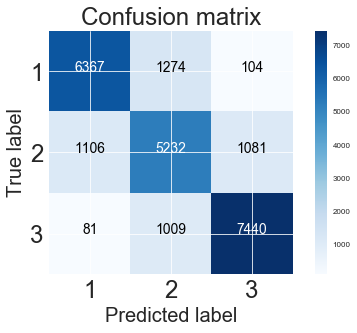

In [431]:
class_names = [1,2,3]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 'x-large',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figtext(0.5,1.,'Confusion matrix', fontsize = 24, ha = 'center')
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label',fontsize = 20)
    
    precision = np.empty([cm.shape[0], cm.shape[1]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        precision[i,j] = cnf_matrix[i,j]/cm[:,i].sum()
    print("Precision Matrix")
    print(precision)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)
                     #title='Confusion matrix')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [343]:
# def Precision_Matrix(cnf_matrix):
#     precision = np.empty([cnf_matrix.shape[0], cnf_matrix.shape[1]])
#     for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
#         precision[i,j] = cnf_matrix[i,j]/cnf_matrix[:,i].sum()
#     return precision           

In [344]:
#Precision_Matrix(cnf_matrix)

## Random Forest:

In [195]:
# #from sklearn import svm, datasets
# #uses a 3-fold CV by default if you do not define otherwise
# from sklearn.model_selection import GridSearchCV

# #parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# #svr = svm.SVC()
# #clf = GridSearchCV(svr, parameters)

# clf = RandomForestClassifier()

# param_grid = {"max_depth": [3, None],
#               "max_features": [3,5,10,13,16],
#               "min_samples_split": [5,10,15],
#               "min_samples_leaf": [5,10,15],
#               "bootstrap": [True],
#               "criterion": ["gini"]}

# grid_search = GridSearchCV(clf, param_grid=param_grid)
# #start = time()
# grid_search.fit(X_coded, y)

# report(grid_search.cv_results_)

# # clf.fit()
# # ...                             
# # GridSearchCV(cv=None, error_score=...,
# #        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
# #                      decision_function_shape=None, degree=..., gamma=...,
# #                      kernel='rbf', max_iter=-1, probability=False,
# #                      random_state=None, shrinking=True, tol=...,
# #                      verbose=False),
# #        fit_params={}, iid=..., n_jobs=1,
# #        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
# #        scoring=..., verbose=...)
# # sorted(clf.cv_results_.keys())
# # ...                             
# # ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
# #  'mean_train_score', 'param_C', 'param_kernel', 'params',...
# #  'rank_test_score', 'split0_test_score',...
# #  'split0_train_score', 'split1_test_score', 'split1_train_score',...
# #  'split2_test_score', 'split2_train_score',...
# #  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

In [433]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# specify parameters and distributions to sample from
param_dist = {"max_depth": [10,5,3,None],
              "max_features": sp_randint(1,3,6),
              "min_samples_split": sp_randint(2,50),
              "min_samples_leaf": sp_randint(2,50),
              "bootstrap": [True, False],
              "criterion": ["gini","entropy"]}

# run randomized search
n_iter_search = 60
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)


random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=60, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14eaf2090>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14eaf2450>, 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14c6fdd50>, 'max_depth': [10, 5, 3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, s

In [434]:
print(random_search.best_estimator_,random_search.best_score_, random_search.best_params_ , random_search.best_index_,random_search.n_splits_ )

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=7,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=8, min_samples_split=19,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.806077597902 {'bootstrap': False, 'min_samples_leaf': 8, 'min_samples_split': 19, 'criterion': 'entropy', 'max_features': 7, 'max_depth': None} 36 3


In [435]:
random_search.best_score_

0.80607759790178168

In [436]:
cv_results = pd.DataFrame.from_dict(random_search.cv_results_)
cv_results.sample(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,0.529337,0.029791,0.586506,0.591119,True,entropy,5,8,18,36,...,0.593630,0.594476,0.583320,0.587937,0.582569,0.590944,0.008943,0.001131,0.005046,0.002672
13,1.314340,0.044984,0.794483,0.819372,False,entropy,None,7,21,33,...,0.791904,0.821305,0.799175,0.817425,0.792370,0.819388,0.099906,0.001701,0.003323,0.001584
34,0.935121,0.039075,0.770408,0.786262,True,entropy,None,8,33,35,...,0.769331,0.786521,0.772967,0.785001,0.768926,0.787265,0.020019,0.000974,0.001817,0.000942
2,0.359904,0.034370,0.527720,0.529466,True,gini,3,7,13,4,...,0.531445,0.535951,0.529383,0.528218,0.522331,0.524228,0.013850,0.009136,0.003902,0.004866
22,1.075533,0.037847,0.679805,0.692530,False,entropy,10,8,41,18,...,0.675457,0.688599,0.687124,0.697580,0.676833,0.691410,0.018712,0.001476,0.005206,0.003751
59,0.757166,0.041037,0.770697,0.788143,True,gini,None,7,32,6,...,0.769168,0.787986,0.776656,0.790238,0.766267,0.786207,0.016109,0.002713,0.004377,0.001649
54,0.588031,0.029620,0.603346,0.606593,False,gini,5,7,26,16,...,0.599707,0.601557,0.611265,0.615205,0.599067,0.603017,0.010402,0.000666,0.005606,0.006119
11,0.601676,0.030730,0.601031,0.605110,False,gini,5,7,10,37,...,0.606164,0.607228,0.593467,0.599522,0.603462,0.608579,0.013041,0.001273,0.005461,0.003989
37,1.365774,0.046434,0.758126,0.778041,False,entropy,None,8,31,9,...,0.756037,0.776617,0.762277,0.780307,0.756064,0.777199,0.060120,0.004872,0.002935,0.001620
40,1.472303,0.051310,0.732423,0.749055,False,entropy,None,8,46,39,...,0.728309,0.745469,0.735254,0.750570,0.733706,0.751126,0.124196,0.007236,0.002977,0.002546


In [437]:
y_true = y_test
y_pred = random_search.best_estimator_.predict(X_test)

Confusion matrix
[[6427 1257   61]
 [1092 5317 1010]
 [  36 1027 7467]]
Precision Matrix
[[ 0.85  0.17  0.01]
 [ 0.14  0.7   0.13]
 [ 0.    0.12  0.87]]


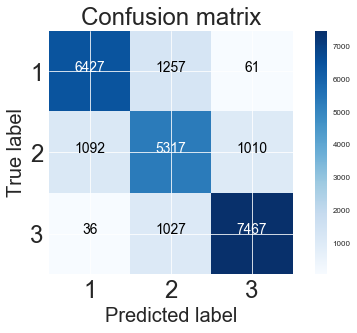

In [441]:
class_names = [1,2,3]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 'x-large',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figtext(0.5,1.,'Confusion matrix', fontsize = 24, ha = 'center')
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label',fontsize = 20)
    
    precision = np.empty([cm.shape[0], cm.shape[1]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        precision[i,j] = cnf_matrix[i,j]/cm[:,i].sum()
    print("Precision Matrix")
    print(precision)
    
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [358]:
importances = random_search.best_estimator_.feature_importances_
feature_importance = importances

8
8
('Percent Male', 'Diagnosis', 'Hospital Ownership', 'Percent Occupied Housing Units', 'Uninsured: %', 'Median Age', 'Median Income', 'State_full')


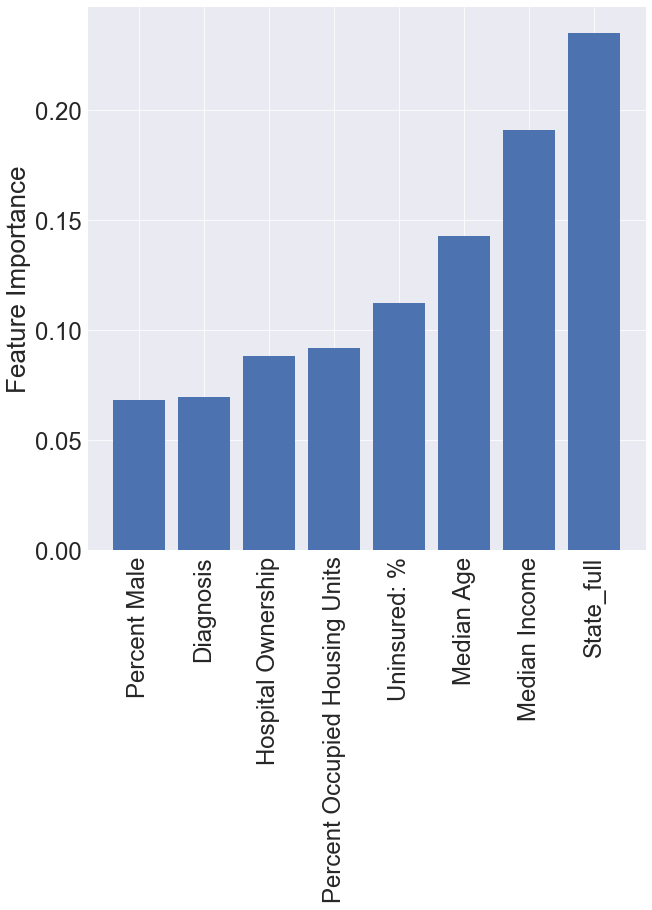

In [359]:
sns.set(context="paper", font='sans-serif')

feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

features = zip(*zipped)[0]
importance = zip(*zipped)[1]
x_pos = np.arange(len(zipped)) 

print(features)

plt.figure(figsize=(10,10))
plt.bar(x_pos, importance ,align='center')
plt.yticks(fontsize = 24) 
plt.xticks(x_pos, features, rotation = 90, fontsize = 24) 
plt.ylabel('Feature Importance', fontsize = 26)

plt.show()

## Logistic regression:


LogisticRegressionCV

In [ ]:
X_train, X_test, y_train, y_test

In [360]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
#logregcv = LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000], cv=3, solver='sag'  , scoring=precision_score, random_state=1)
logregcv = LogisticRegressionCV(Cs=[0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000],\
                                cv=3, \
                                solver='sag', \
                                scoring='f1',\
                                random_state=1)


logregcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000],
           class_weight=None, cv=3, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=1, refit=True,
           scoring='f1', solver='sag', tol=0.0001, verbose=0)

In [361]:
print(logregcv.classes_)
print(logregcv.C_)


[ 0.  1.  2.]
[  1.00e-05   1.00e-06   1.00e-04]


In [362]:
acc_train_cv = logregcv.score(X_train, y_train)
acc_test_cv = logregcv.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (acc_train_cv, acc_test_cv))

train_score=0.481
test_score =0.480



In [365]:
y_true = y_test
y_pred = logregcv.predict(X_test)

Confusion matrix, without normalization
[[4900  479 2366]
 [3157  598 3664]
 [2004  646 5880]]
Precision Matrix
[[ 0.49  0.05  0.24]
 [ 1.83  0.35  2.13]
 [ 0.17  0.05  0.49]]


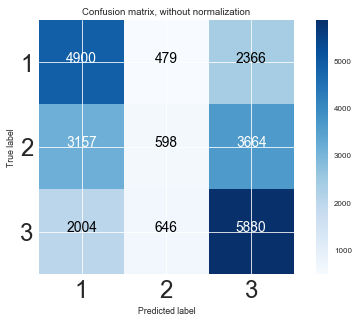

In [366]:
class_names = [1,2,3]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 'x-large',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    precision = np.empty([cm.shape[0], cm.shape[1]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        precision[i,j] = cnf_matrix[i,j]/cm[:,i].sum()
    print("Precision Matrix")
    print(precision)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [363]:
y_true = y_test
y_pred = logregcv.predict(X_test)

In [390]:

# from sklearn import linear_model, datasets, cross_validation, metrics

# #print("Accuracy: %2f" % metrics.accuracy_score(y_true, y_pred))
# #print("Precision: %2f" % metrics.precision_score(y_true, y_pred, average="macro"))
# #print("F1: %2f" % metrics.f1_score(y_true, y_pred, average="macro"))
 
# for label in np.arange(3):
#     false_positive_rate, recall, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=label)
#     roc_auc = metrics.auc(false_positive_rate, recall)
#     plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.2f' % (label, roc_auc))

# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.ylabel('Recall')
# plt.xlabel('Fall-out')
# plt.show()


Gridsearch

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
logregGS= GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
       estimator=LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
          penalty='l2', tol=0.0001),
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

lr = logregGS.fit(X_train, y_train)
train_acc=lr.score(X_train, y_train)
test_acc=lr.score(X_test, y_test)

In [256]:
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

Training Data Accuracy: 0.49
Test Data Accuracy:     0.48


## SVC:

In [391]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1.0, 10., 100.],
              'degree':[2,3,4],
              'kernel':['rbf'],
              'gamma':[3,4]}

svm = GridSearchCV(SVC(), param_grid=param_grid)
svm.fit(X_train, y_train)

#plot_data(X_train, y_train, svm, 'SVC with Kernel: Non-Linearly Separable Data')

# The accuracy
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

NameError: name 'plot_data' is not defined

In [392]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.61340423736


In [395]:
svm_results = pd.DataFrame.from_dict(svm.cv_results_)
svm_results.sample(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
14,337.082707,15.215601,0.540327,0.995686,100,3,3,rbf,"{u'kernel': u'rbf', u'C': 100.0, u'gamma': 3, ...",1,0.540941,0.995442,0.541375,0.996012,0.538666,0.995605,52.580335,0.122543,0.001188,0.00024
10,250.514297,15.754154,0.540327,0.995686,10,4,3,rbf,"{u'kernel': u'rbf', u'C': 10.0, u'gamma': 3, u...",1,0.540941,0.995442,0.541375,0.996012,0.538666,0.995605,0.513617,0.031668,0.001188,0.00024
1,182.596700,15.826725,0.363842,0.995686,1,2,4,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 4, u'...",16,0.363612,0.995442,0.364263,0.996012,0.363651,0.995605,0.226912,0.014528,0.000298,0.00024
7,255.587922,15.740578,0.363969,0.995686,10,2,4,rbf,"{u'kernel': u'rbf', u'C': 10.0, u'gamma': 4, u...",10,0.363666,0.995442,0.364426,0.996012,0.363814,0.995605,0.734185,0.044624,0.000329,0.00024
2,187.122463,15.791883,0.397974,0.995686,1,3,3,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 3, u'...",7,0.397797,0.995442,0.399913,0.996012,0.396212,0.995605,0.287565,0.010359,0.001516,0.00024
17,266.279067,15.868367,0.363969,0.995686,100,4,4,rbf,"{u'kernel': u'rbf', u'C': 100.0, u'gamma': 4, ...",10,0.363666,0.995442,0.364426,0.996012,0.363814,0.995605,14.628565,0.608439,0.000329,0.00024
13,297.431525,17.839929,0.363969,0.995686,100,2,4,rbf,"{u'kernel': u'rbf', u'C': 100.0, u'gamma': 4, ...",10,0.363666,0.995442,0.364426,0.996012,0.363814,0.995605,11.062168,0.753418,0.000329,0.00024
5,181.761693,15.846814,0.363842,0.995686,1,4,4,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 4, u'...",16,0.363612,0.995442,0.364263,0.996012,0.363651,0.995605,0.730632,0.082126,0.000298,0.00024
3,182.725271,15.750871,0.363842,0.995686,1,3,4,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 4, u'...",16,0.363612,0.995442,0.364263,0.996012,0.363651,0.995605,0.895626,0.084623,0.000298,0.00024
8,250.703139,15.766860,0.540327,0.995686,10,3,3,rbf,"{u'kernel': u'rbf', u'C': 10.0, u'gamma': 3, u...",1,0.540941,0.995442,0.541375,0.996012,0.538666,0.995605,0.072944,0.042529,0.001188,0.00024


In [396]:
svm.best_estimator_ 

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [397]:
svm.best_params_

{'C': 10.0, 'degree': 2, 'gamma': 3, 'kernel': 'rbf'}

In [405]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.61340423736


Confusion matrix, without normalization
[[4971  273 2501]
 [1369 1368 4682]
 [  89  246 8195]]
Precision Matrix
[[ 0.77  0.04  0.39]
 [ 0.73  0.72  2.48]
 [ 0.01  0.02  0.53]]


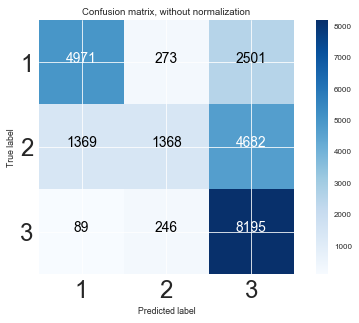

In [406]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

## Decision Trees:

In [400]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [10,5,3,None],
              "max_features": sp_randint(1,6),
              "min_samples_split": sp_randint(2,20),
              "min_samples_leaf": sp_randint(2,20),
              "criterion": ["gini","entropy"],
              'splitter': ['best']}

# run randomized search
n_iter_search = 60
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)


random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=60, n_jobs=1,
          param_distributions={'splitter': ['best'], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1205a6950>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x151d84dd0>, 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x14bc7c2d0>, 'max_depth': [10, 5, 3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [403]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 19,
 'splitter': 'best'}

In [404]:
random_search.best_estimator_ 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=19,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [408]:
acc_train_dt = random_search.score(X_train, y_train)
acc_test_dt = random_search.score(X_test, y_test)

print(acc_train_dt)
print(acc_test_dt)


0.855023966718
0.80024478771


0.80024478771
Confusion matrix, without normalization
[[6430 1249   66]
 [1245 5162 1012]
 [  63 1098 7369]]
Precision Matrix
[[ 0.83  0.16  0.01]
 [ 0.17  0.69  0.13]
 [ 0.01  0.13  0.87]]


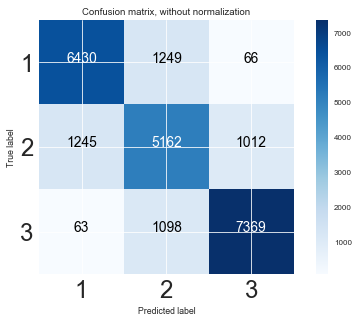

In [410]:
y_pred = random_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

## Naive Bayes:

In [82]:
Y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

In [83]:
X_coded.head()

,DRG_Definition,Hospital_Ownership,Median_Age,Percent_Occupied_Housing_Units_x,Percent_over_65,Percent_Native_American,Percent_asian,Percent Black or African American,Percent_hispanic_or_latino,Percent_Male,Percent_white,Rental_vacancy_rate,Homeowner_vacancy_rate,Average_family_size,Median_income_zip,Zip_population
6158,0,978,113,213,80,3,7,220,25,22,199,61,18,33,775,2049
6159,0,978,110,197,84,7,4,15,117,35,363,49,19,42,459,701
6160,0,978,132,192,103,3,6,98,18,21,351,56,15,26,4263,2930
6161,0,985,99,186,66,2,13,300,35,16,71,96,28,42,1875,987
6162,0,985,97,224,41,2,18,104,55,32,319,89,21,45,2268,1457


In [84]:
#print("repres,  len, shape: ", len(representatives), representatives.shape)
print("X--> len, shape(X): ", len(X), X_coded.shape)
print("Y--> len, shape(Y): ", len(Y), Y.shape)

print("\n")
#print X.head()
print(Y.head())

testpct = 0.30
#testpct = 0.25

X_train, X_test, Y_train, Y_test = train_test_split(X_coded,Y, test_size=testpct, random_state=4444)

X--> len, shape(X):  91470 (91470, 16)
Y--> len, shape(Y):  91470 (91470,)


6158    1
6159    0
6160    1
6161    2
6162    1
Name: log_Average_Covered_Charges_mean_3_bins, dtype: object


In [229]:
#X_train, X_test, y_train, y_test

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=18),
            LogisticRegression(C=0.1), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='macro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='macro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='macro')

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='macro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='macro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='macro'))
    
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

        0.0       0.82      0.81      0.82      7745
        1.0       0.68      0.68      0.68      7419
        2.0       0.85      0.86      0.85      8530

avg / total       0.79      0.79      0.79     23694

   accuracy score             0.7884 
   precision score            0.7849 
   recall score               0.7847 
   f1 score                   0.7848 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

        0.0       0.50      0.63      0.56      7745
        1.0       0.34      0.10      0.16      7419
        2.0       0.50      0.68      0.58      8530

avg / total       0.45      0.48      0.44     23694

   accuracy score             0.4840 
   precision score            0.4455 
   recall score               0.4719 
   f1 score                   0.4303 


DecisionTreeClassifier
-----

## Try GridSearchCV:

In [103]:
y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

In [104]:
X_coded = X.apply(preprocessing.LabelEncoder().fit_transform)

In [108]:
#from sklearn import svm, datasets
#uses a 3-fold CV by default if you do not define otherwise
from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svr = svm.SVC()
#clf = GridSearchCV(svr, parameters)

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "max_features": [3,5,10,13,16],
              "min_samples_split": [3, 5, 10],
              "min_samples_leaf": [ 3, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid)
#start = time()
grid_search.fit(X_coded, y)

report(grid_search.cv_results_)

# clf.fit()
# ...                             
# GridSearchCV(cv=None, error_score=...,
#        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
#                      decision_function_shape=None, degree=..., gamma=...,
#                      kernel='rbf', max_iter=-1, probability=False,
#                      random_state=None, shrinking=True, tol=...,
#                      verbose=False),
#        fit_params={}, iid=..., n_jobs=1,
#        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
#        scoring=..., verbose=...)
# sorted(clf.cv_results_.keys())
# ...                             
# ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
#  'mean_train_score', 'param_C', 'param_kernel', 'params',...
#  'rank_test_score', 'split0_test_score',...
#  'split0_train_score', 'split1_test_score', 'split1_train_score',...
#  'split2_test_score', 'split2_train_score',...
#  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

NameError: name 'report' is not defined

In [109]:
grid_search.cv_results_

{'mean_fit_time': array([  0.61455544,   0.49780329,   0.48549819,   0.45986724,
          0.45395939,   1.70716135,   0.51489067,   0.51450666,
          0.61680603,   0.6906027 ,   0.67915567,   0.61333275,
          0.72450407,   0.68143201,   0.57891226,   0.60956812,
          0.61246864,   0.65830294,   0.93721302,   0.86222537,
          1.05629333,   1.18146237,   0.87259467,   1.22991467,
          1.37275068,   1.13567734,   1.38668307,   1.78669691,
          2.26233498,   1.33464495,   1.13190309,   1.11038995,
          0.99854636,   1.03981026,   1.14127763,   0.99660691,
          1.30103064,   1.22271427,   1.16722735,   1.20500167,
          1.22337802,   1.23346329,   1.26823831,   1.2293303 ,
          1.26368332,   1.05452863,   1.03893129,   1.0563097 ,
          1.021161  ,   1.1491123 ,   1.0849967 ,   1.00108131,
          1.03269839,   1.11201938,   1.55850935,   1.89218656,
          1.96272127,   2.19331662,   1.91786075,   1.66217597,
          1.56444534,  

In [110]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=13, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [111]:
grid_search.best_score_

0.80302831529463214

In [112]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [114]:
for algorithm in [RandomForestClassifier(bootstrap =  True,criterion = 'gini',\
                                         max_depth= None, max_features = 13,\
                                         min_samples_leaf= 10, min_samples_split = 10)]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.85      0.84      0.85      9780
          1       0.71      0.72      0.71      8635
          2       0.87      0.87      0.87      9026

avg / total       0.81      0.81      0.81     27441

   accuracy score             0.8127 
   precision score            0.8127 
   recall score               0.8127 
   f1 score                   0.8127 
feature_importance =  [ 0.04546597  0.08433372  0.04264243  0.03977599  0.0334963   0.02996351
  0.06058165  0.0343369   0.17579898  0.03296311  0.08140001  0.04576934
  0.03396756  0.04314959  0.10647143  0.1098835 ]
max_tree_depth =  [28, 25, 26, 27, 29, 26, 25, 29, 25, 26]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.8127

Precision
  RandomForestClassifier         0.8127

Recall
  RandomForestClassifier         0.8127

F1
  RandomForestClassifier         0.8127


In [115]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

16
16


[('Percent_Native_American', 0.029963510053299124),
 ('Percent_Male', 0.032963111179264981),
 ('Percent_over_65', 0.033496300721510434),
 ('Homeowner_vacancy_rate', 0.033967564328302849),
 ('Percent Black or African American', 0.034336903183365658),
 ('Percent_Occupied_Housing_Units_x', 0.039775987048936236),
 ('Median_Age', 0.042642430746133844),
 ('Average_family_size', 0.043149590800956372),
 ('DRG_Definition', 0.045465970046231464),
 ('Rental_vacancy_rate', 0.045769342644743319),
 ('Percent_asian', 0.060581646405008363),
 ('Percent_white', 0.08140000621446028),
 ('Hospital_Ownership', 0.084333718462242219),
 ('Median_income_zip', 0.10647143388072267),
 ('Zip_population', 0.10988350156311384),
 ('Percent_hispanic_or_latino', 0.17579898272170838)]

In [131]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = Y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=7),
            LogisticRegression(C=0.1), 
            SVC(),  
            GaussianNB(), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.75      0.81      0.78     14451
          1       0.77      0.70      0.73     12990

avg / total       0.76      0.76      0.76     27441

   accuracy score             0.7580 
   precision score            0.7688 
   recall score               0.6989 
   f1 score                   0.7322 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.57      0.70      0.63     14451
          1       0.56      0.42      0.48     12990

avg / total       0.57      0.57      0.56     27441

   accuracy score             0.5682 
   precision score            0.5578 
   recall score               0.4236 
   f1 score                   0.4815 


SVC
--------------------
classification report
             precision    recall  f1-score   support

          0       0.68      0.83 

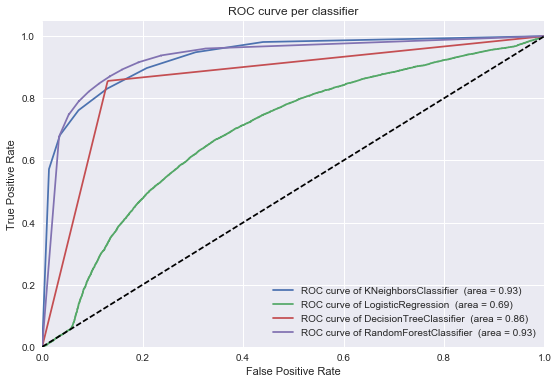

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([KNeighborsClassifier(n_neighbors=7),
            LogisticRegression(C=1), 
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

In [101]:




from sklearn.ensemble import RandomForestClassifier


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = Y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [RandomForestClassifier()]:
     
    algorithm.fit(X_train, Y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    importances = algorithm.feature_importances_
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred, average='micro')
    recall_dict[alg_label] = recall_score(y_obs, y_pred, average='micro')
    f1_dict[alg_label] = f1_score(y_obs, y_pred, average='micro')
    feature_importance = importances
    estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

    print( '\n')
    print(alg_label)
    print('-'*20)
    #print
    print( "classification report")
    print( classification_report(y_obs, y_pred))
    #print
    print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='micro'))
    print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='micro'))
    print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='micro'))
    print('feature_importance = ', feature_importance)
    print('max_tree_depth = ', estimators)
    

    
def print_items(dictionary):
    for k,v in dictionary.iteritems():
        spaces = 30-len(k)
        newclf = k + ' '*spaces
        print( '  %s %.4f' % (newclf, v))
        

print( '\nPresent by Statistics to Compare Models')

print( '\nAccuracy')
print_items(accuracy_dict)

print( '\nPrecision')
print_items(precision_dict)

print( '\nRecall')
print_items(recall_dict)

print( '\nF1')
print_items(f1_dict)



RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.80      0.83      0.81      9780
          1       0.65      0.63      0.64      8635
          2       0.85      0.84      0.84      9026

avg / total       0.77      0.77      0.77     27441

   accuracy score             0.7694 
   precision score            0.7694 
   recall score               0.7694 
   f1 score                   0.7694 
feature_importance =  [ 0.29122416  0.0546365   0.03659541  0.0357418   0.04289029  0.02369212
  0.0439921   0.03607693  0.09270361  0.03024814  0.04765336  0.0371703
  0.02603291  0.03555152  0.08681512  0.07897573]
max_tree_depth =  [35, 33, 32, 35, 39, 36, 33, 34, 39, 35]

Present by Statistics to Compare Models

Accuracy
  RandomForestClassifier         0.7694

Precision
  RandomForestClassifier         0.7694

Recall
  RandomForestClassifier         0.7694

F1
  RandomForestClassifier         0.7694


In [102]:
feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

#print(feature_importance)

16
16


[('Percent_Native_American', 0.023692123180273628),
 ('Homeowner_vacancy_rate', 0.026032907664215694),
 ('Percent_Male', 0.030248137076246667),
 ('Average_family_size', 0.035551517874974348),
 ('Percent_Occupied_Housing_Units_x', 0.03574179800041509),
 ('Percent Black or African American', 0.036076933262104718),
 ('Median_Age', 0.03659540802276505),
 ('Rental_vacancy_rate', 0.037170303703914456),
 ('Percent_over_65', 0.042890292479209502),
 ('Percent_asian', 0.043992096942052757),
 ('Percent_white', 0.047653361878014666),
 ('Hospital_Ownership', 0.054636497466356473),
 ('Zip_population', 0.078975726090200066),
 ('Median_income_zip', 0.086815124501482224),
 ('Percent_hispanic_or_latino', 0.092703613205156021),
 ('DRG_Definition', 0.29122415865261864)]

In [75]:
# Y = df_Model_1a['log_Average_Covered_Charges_mean_3_bins']

# #from sklearn.preprocessing import label_binarize

# #Y_bin = label_binarize(Y, classes=[0,1,2])


In [78]:
# Y_bin

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [79]:
# #print("repres,  len, shape: ", len(representatives), representatives.shape)
# print("X--> len, shape(X): ", len(X), X_coded.shape)
# print("Y--> len, shape(Y): ", len(Y), Y.shape)

# print("\n")
# #print X.head()
# print(Y.head())

# testpct = 0.30
# #testpct = 0.25

# X_train, X_test, Y_train, Y_test = train_test_split(X_coded,Y_bin, test_size=testpct, random_state=4444)

X--> len, shape(X):  91470 (91470, 16)
Y--> len, shape(Y):  91470 (91470,)


6158    1
6159    0
6160    1
6161    2
6162    1
Name: log_Average_Covered_Charges_mean_3_bins, dtype: object


In [80]:

# accuracy_dict = dict()
# precision_dict = dict()
# recall_dict = dict()
# f1_dict = dict()
 
# for algorithm in [RandomForestClassifier()]:
     
#     algorithm.fit(X_train, Y_train)
#     y_pred = algorithm.predict(X_test)
#     alg_label = str(algorithm)
#     alg_label = alg_label[:alg_label.index('(')]
#     importances = algorithm.feature_importances_
#     # create dictionary of stats
#     accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
#     precision_dict[alg_label] = precision_score(y_obs, y_pred, average='macro')
#     recall_dict[alg_label] = recall_score(y_obs, y_pred, average='macro')
#     f1_dict[alg_label] = f1_score(y_obs, y_pred, average='macro')
#     feature_importance = importances
#     estimators = [estimator.tree_.max_depth for estimator in algorithm.estimators_]

#     print( '\n')
#     print(alg_label)
#     print('-'*20)
#     #print
#     print( "classification report")
#     print( classification_report(y_obs, y_pred))
#     #print
#     print( '   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
#     print( '   precision score            %.4f ' % precision_score(y_obs, y_pred, average='macro'))
#     print( '   recall score               %.4f ' % recall_score(y_obs, y_pred, average='macro'))
#     print( '   f1 score                   %.4f ' % f1_score(y_obs, y_pred, average='macro'))
#     print('feature_importance = ', feature_importance)
#     print('max_tree_depth = ', estimators)
    

    
# def print_items(dictionary):
#     for k,v in dictionary.iteritems():
#         spaces = 30-len(k)
#         newclf = k + ' '*spaces
#         print( '  %s %.4f' % (newclf, v))
        

# print( '\nPresent by Statistics to Compare Models')

# print( '\nAccuracy')
# print_items(accuracy_dict)

# print( '\nPrecision')
# print_items(precision_dict)

# print( '\nRecall')
# print_items(recall_dict)

# print( '\nF1')
# print_items(f1_dict)

ValueError: Can't handle mix of multiclass and multilabel-indicator

In [88]:
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [89]:
y_true = y_test
y_pred = clf.predict(X_test)

In [98]:
y_true.value_counts()

0    9815
2    8953
1    8673
Name: log_Average_Covered_Charges_mean_3_bins, dtype: int64

In [100]:
y_pred

array(['2', '0', '2', ..., '0', '0', '0'], dtype=object)

In [94]:
confusion_matrix(y_true, y_pred, labels=["0", "1", "2"])

array([[6069,  114, 3632],
       [5335,  108, 3230],
       [5484,  135, 3334]])

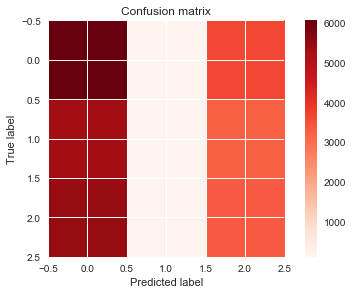

In [95]:
cm=confusion_matrix(y_true, y_pred, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)

In [ ]:
conf = confusion_matrix(y_true, y_pred)
precision = (conf[0, 0] / (conf[0, 0] + conf[1, 0]))
recall = (conf[0, 0] / (conf[0, 0] + conf[0, 1]))
F1 = 2*((precision*recall)/(precision+recall))
            
print(conf)
print ('\n')
print ("Test Data Accuracy:     %0.2f" %(test_acc))

print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
print ("F1:                     %0.2f" % F1)
cm=confusion_matrix(y_true, y_pred, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)

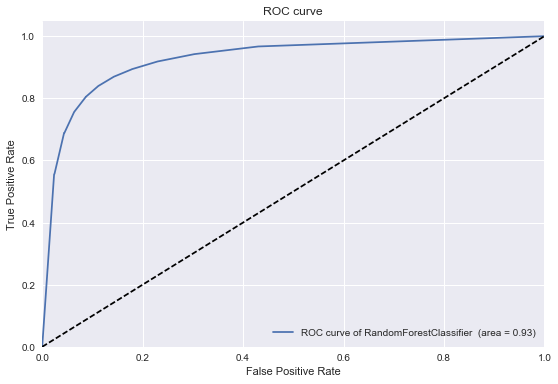

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
    
y_obs = Y_test

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([RandomForestClassifier()]):
    alg.fit(X_train, Y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, Y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, Y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [140]:
[estimator.tree_.max_depth for estimator in forest.estimators_]

NameError: name 'forest' is not defined

In [608]:
df_Model_1a_HF = df_Model_1a[df_Model_1a.DRG_Definition == '291 - HEART FAILURE & SHOCK W MCC']

In [610]:
X_HF = df_Model_1a_HF.drop(['Provider_ID','Covered_Charges', 'Total_Payments', 'Medicare_Payments','Patient_Payments'],1)

In [615]:
y_HF = df_Model_1a_HF['Covered_Charges']

In [616]:
X_HFcoded = X_HF.apply(preprocessing.LabelEncoder().fit_transform)

In [618]:
from sklearn.preprocessing import label_binarize
y_HFcoded = label_binarize(y_HF,classes=[0, 1, 2])

In [626]:
X_train, X_test, y_train, y_test = train_test_split(X_HFcoded, y_HF, test_size=0.3)

In [625]:
y_HFcoded


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [627]:
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(Cs=[0.1,1,10,100,1000,10000,100000,200000,300000], cv=10, random_state=1)
logregcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10, 100, 1000, 10000, 100000, 200000, 300000],
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=1, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [628]:
acc_train_cv = logregcv.score(X_train, y_train)
acc_test_cv = logregcv.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (acc_train_cv, acc_test_cv))

train_score=0.555
test_score =0.549



In [629]:
print(logregcv.classes_)
print(logregcv.C_)
print(logregcv.intercept_)
print(logregcv.coef_)
print(logregcv.coefs_paths_)

['0' '1' '2']
[ 0.1  0.1  0.1]
[-0.48565414 -1.49320878 -0.13953182]
[[ 0.          0.02974857 -0.00059755 -0.00116219  0.00522333]
 [ 0.         -0.00258616  0.00025892 -0.01165866 -0.00080647]
 [ 0.         -0.03329227  0.00046828  0.00243223 -0.00568168]]
{'1': array([[[  0.00000000e+00,  -5.00893858e-03,   2.83731718e-04,
          -1.48617054e-02,  -9.30182220e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893868e-03,   2.83732356e-04,
          -1.48617057e-02,  -9.30182273e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893924e-03,   2.83731677e-04,
          -1.48617072e-02,  -9.30182797e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893934e-03,   2.83732410e-04,
          -1.48617075e-02,  -9.30182841e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00893991e-03,   2.83731729e-04,
          -1.48617089e-02,  -9.30183351e-04,  -1.43390966e+00],
        [  0.00000000e+00,  -5.00894000e-03,   2.83732460e-04,
          -1.48617092e-02,  -9.301833

26738.109949856756

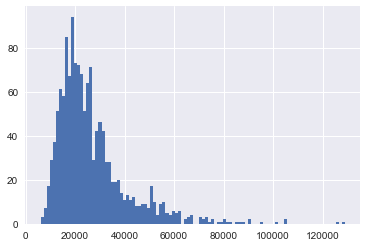

In [123]:
Pulmonary_embolism_df['Average_Covered_Charges'].hist(bins = 100)
Pulmonary_embolism_df['Average_Covered_Charges'].mean()

7279.95497851


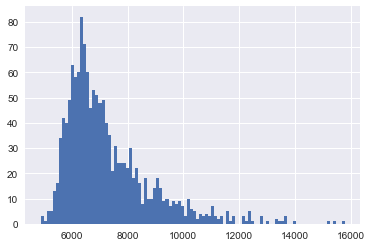

In [121]:
Pulmonary_embolism_df['Average_Total_Payments'].hist(bins = 100)
print(Pulmonary_embolism_df['Average_Total_Payments'].mean())

6077.94866046


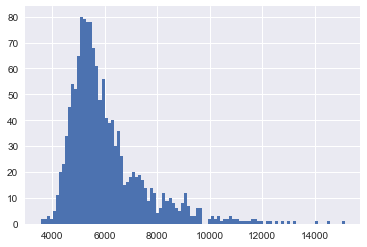

In [122]:
Pulmonary_embolism_df['Average_Medicare_Payments'].hist(bins = 100)
print(Pulmonary_embolism_df['Average_Medicare_Payments'].mean())


In [133]:
Pulmonary_embolism_df['Average_Medicare_Payments'].iloc[0]

5338.0900000000001

In [139]:
n=0
average_comp = []
for entry in Pulmonary_embolism_df['Average_Medicare_Payments']:
    if entry > Pulmonary_embolism_df['Average_Medicare_Payments'].mean():
        #Pulmonary_embolism_df['Medicare_Payments'].iloc[n] == '1'
        average_comp.append('1')
    else:
        #Pulmonary_embolism_df['Medicare_Payments'].iloc[n] == '0'
        average_comp.append('0')
    n=n+1

Pulmonary_embolism_df['Medicare_Payments'] = average_comp

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [140]:
Pulmonary_embolism_df.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Medicare_Payments
13536,176 - PULMONARY EMBOLISM W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,23680.30,6020.27,5338.09,0
13537,176 - PULMONARY EMBOLISM W/O MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,14,23228.42,5599.57,4633.85,0
13538,176 - PULMONARY EMBOLISM W/O MCC,10010,MARSHALL MEDICAL CENTER NORTH,8000 ALABAMA HIGHWAY 69,GUNTERSVILLE,AL,35976,AL - Huntsville,12,12814.00,5446.41,4977.41,0
13539,176 - PULMONARY EMBOLISM W/O MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,17,18820.05,6294.29,4565.70,0
13540,176 - PULMONARY EMBOLISM W/O MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,17,31418.05,6328.70,4887.00,0


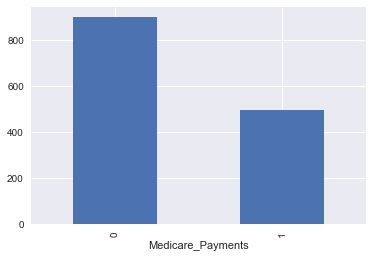

In [141]:
Pulmonary_embolism_df['Medicare_Payments'].groupby([Pulmonary_embolism_df.Medicare_Payments]).count().plot(kind = 'bar')